In [21]:
import pandas as pd
import math
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("data.csv", encoding='latin1', low_memory=False)
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [6]:
x=data['no2']

In [14]:
r=int(input("Your roll number : "))
a=0.05*(r%7)
b=0.3*(r%5 +1)
z=x+a*(b*x).apply(math.sin)
z=z.dropna()
z

Your roll number : 102317138


,no2
0,17.4
1,7.0
2,28.5
3,14.7
4,7.5
...,...
435734,44.0
435735,44.0
435736,45.0
435737,50.0


In [15]:
hist,b=np.histogram(z,bins=50,density=True)
b_c=(b[:-1]+b[1:])/2

In [16]:
def model(z,c,μ,λ):
  return c*np.exp(-λ*(z-μ)**2)

In [27]:
i=[1.0,np.mean(z),1.0/np.var(z)]
para,curve=curve_fit(model,b_c,hist,p0=i,maxfev=5000)
c,μ,λ=para
print("Estimated parameters:\nc=",c,"\nλ=",λ,"\nμ=",μ)

Estimated parameters:
c= 0.02680311584081422 
λ= 0.002057693030878697 
μ= 19.629308102018342


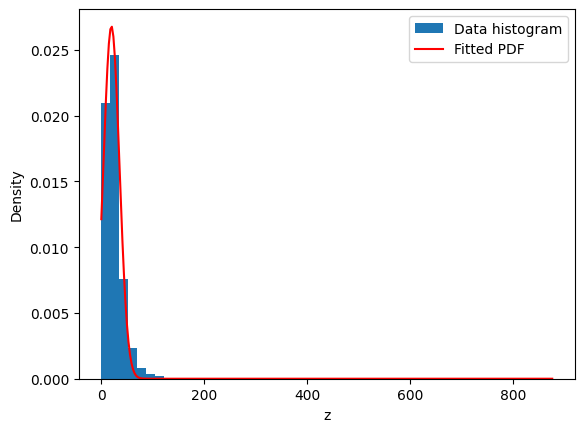

In [30]:
plt.hist(z,bins=50,density=True,label='Data histogram')
z_range=np.linspace(z.min(), z.max(), 300)
plt.plot(z_range, model(z_range,c,μ,λ),'r-',label='Fitted PDF')
plt.legend()
plt.xlabel('z')
plt.ylabel('Density')
plt.show()